In [ ]:
# Prophet Model with US Holidays and Best Hyperparameters

In this notebook, we will create a Prophet model using US holidays along with the best hyperparameters identified previously. We will evaluate the model's performance using several metrics.

In [4]:
## Import Required Libraries
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import joblib
import os

# Change the directory to the processed data
os.chdir("/Users/alexanderschou/Desktop/Projects/adv_mla_2024/AT2_experimentation/data/processed")


In [ ]:
## Load Processed Data

We will load the training and test datasets that we prepared earlier.


In [5]:
# Load the processed sales data
sales_train_processed = pd.read_csv('sales_train_processed.csv')
sales_test_processed = pd.read_csv('sales_test_processed.csv')

# Convert 'date' to datetime
sales_train_processed['date'] = pd.to_datetime(sales_train_processed['date'])
sales_test_processed['date'] = pd.to_datetime(sales_test_processed['date'])


/var/folders/mh/j3zy8xqx2v32dk0tv4nx5x8m0000gn/T/ipykernel_7525/1237022638.py:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_processed = pd.read_csv('sales_train_processed.csv')
/var/folders/mh/j3zy8xqx2v32dk0tv4nx5x8m0000gn/T/ipykernel_7525/1237022638.py:3: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_test_processed = pd.read_csv('sales_test_processed.csv')


In [ ]:
## Prepare Data for Prophet

We will group the data by date and prepare it for fitting the Prophet model.


In [6]:
# Prepare training data
daily_sales_train = sales_train_processed.groupby('date')['revenue'].sum().reset_index()
daily_sales_train.rename(columns={'date': 'ds', 'revenue': 'y'}, inplace=True)

# Prepare test data
daily_sales_test = sales_test_processed.groupby('date')['revenue'].sum().reset_index()
daily_sales_test.rename(columns={'date': 'ds', 'revenue': 'y'}, inplace=True)


In [ ]:
## Create Prophet Model with US Holidays

We will create a Prophet model and add US holidays using the built-in function.


In [70]:
# Create Prophet model with US holidays
#model = Prophet(
#    changepoint_prior_scale=0.001,
#    seasonality_mode='multiplicative',
#    holidays_prior_scale=10.0
#)

model = Prophet()
# Add US holidays
model.add_country_holidays(country_name='US')

# Add the best add_seasonality
#model.add_seasonality(name='monthly', period=30, fourier_order=5)

# Fit the model
model.fit(daily_sales_train)


10:59:21 - cmdstanpy - INFO - Chain [1] start processing
10:59:21 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
## Make Predictions

We will make predictions on the test dataset.


In [71]:
# Make predictions
future_test = model.make_future_dataframe(periods=len(daily_sales_test), include_history=False)
forecast_test = model.predict(future_test)


In [ ]:
## Evaluate the Model

We will evaluate the model using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE).


In [72]:
# Prepare evaluation DataFrame
forecast_test_filtered = forecast_test[['ds', 'yhat']].head(len(daily_sales_test))
evaluation_df = pd.merge(daily_sales_test, forecast_test_filtered, on='ds')

# Calculate metrics
mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
mse = mean_squared_error(evaluation_df['y'], evaluation_df['yhat'], squared=False)
mape = mean_absolute_percentage_error(evaluation_df['y'], evaluation_df['yhat'])

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")


Mean Absolute Error (MAE): 9527.637693924014
Mean Squared Error (MSE): 12524.599102674558
Mean Absolute Percentage Error (MAPE): 204.86%


/Users/alexanderschou/Library/Caches/pypoetry/virtualenvs/at2-experimentation-YINVk6u--py3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
## Save the Model

We will save the trained model for future use.


In [ ]:
# Save the model
#joblib.dump(model, 'prophet_sales_model_with_holidays_and_best_params.pkl')


In [22]:
def plot_forecast(actual, forecast):
    plt.figure(figsize=(12, 6))
    plt.plot(actual['ds'], actual['y'], label='Actual Sales', marker='o')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Sales', marker='x')
    plt.title('Actual vs Predicted Sales with Holidays')
    plt.xlabel('Date')
    plt.ylabel('Sales Revenue')
    plt.legend()
    plt.show()

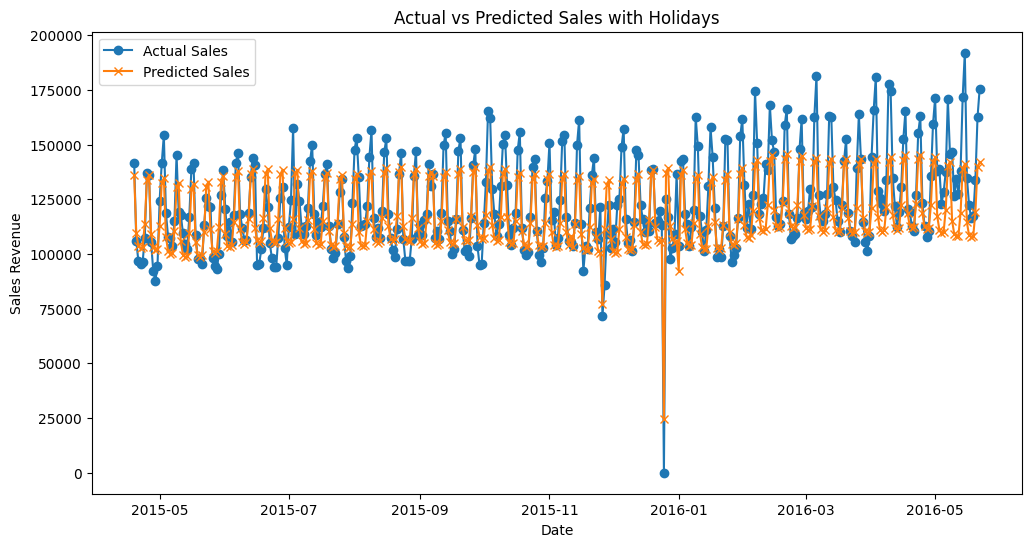

In [73]:
import matplotlib.pyplot as plt
plot_forecast(daily_sales_test, forecast_test_filtered)

In [91]:
pd.set_option("display.max_columns",None)
forecast_test[forecast_test["ds"]=="2015-12-25"]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),Christmas Day (observed)_lower,Christmas Day (observed)_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Independence Day (observed),Independence Day (observed)_lower,Independence Day (observed)_upper,Labor Day,Labor Day_lower,Labor Day_upper,Martin Luther King Jr. Day,Martin Luther King Jr. Day_lower,Martin Luther King Jr. Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (observed),New Year's Day (observed)_lower,New Year's Day (observed)_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Veterans Day (observed),Veterans Day (observed)_lower,Veterans Day (observed)_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
250,2015-12-25,118629.51209,13324.335682,36687.400528,117341.4672,119923.152732,-92499.941162,-92499.941162,-92499.941162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-94266.34831,-94266.34831,-94266.34831,-92499.941162,-92499.941162,-92499.941162,-951.058836,-951.058836,-951.058836,-815.348311,-815.348311,-815.348311,0.0,0.0,0.0,24363.163781


In [ ]:
# Prepare the hyperparameter-tuned model with a focus on holidays
best_hyperparams = {
    'changepoint_prior_scale': 0.001,
    'seasonality_mode': ['multiplicative',7],
    #'fourier_order': "7"  
}

# Initialize the Prophet model
model_best = Prophet(**best_hyperparams)

# Add U.S. holidays to the model
model_best.add_country_holidays(country_name='US')

# Fit the model on training data
model_best.fit(daily_sales_train)

# Make predictions for the test set
future_test = model_best.make_future_dataframe(periods=len(daily_sales_test), include_history=False)
forecast_test = model_best.predict(future_test)

# Prepare evaluation DataFrame
forecast_test_filtered = forecast_test[['ds', 'yhat']].head(len(daily_sales_test))
evaluation_df = pd.merge(daily_sales_test, forecast_test_filtered, on='ds')

# Calculate metrics
mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
mse = mean_squared_error(evaluation_df['y'], evaluation_df['yhat'], squared=False)
mape = mean_absolute_percentage_error(evaluation_df['y'], evaluation_df['yhat'])

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

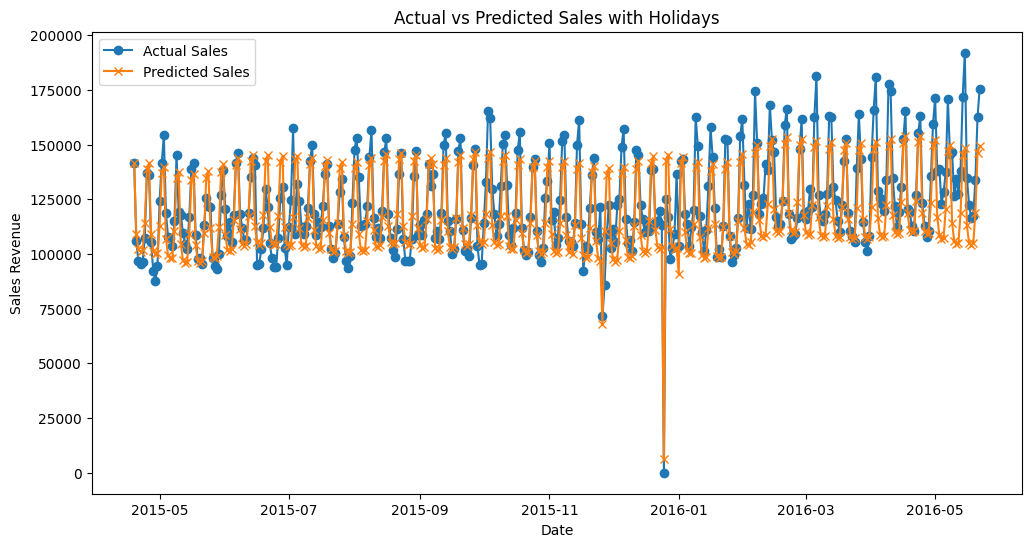

In [99]:
plot_forecast(daily_sales_test, forecast_test_filtered)

In [48]:
holiday_effects = forecast_test[['ds', 'holidays']]
print(holiday_effects[holiday_effects['holidays'].notnull()])

            ds  holidays
0   2015-04-19       0.0
1   2015-04-20       0.0
2   2015-04-21       0.0
3   2015-04-22       0.0
4   2015-04-23       0.0
..         ...       ...
395 2016-05-18       0.0
396 2016-05-19       0.0
397 2016-05-20       0.0
398 2016-05-21       0.0
399 2016-05-22       0.0

[400 rows x 2 columns]


In [92]:
holiday_effects[holiday_effects["ds"]=="2015-12-25"]

,ds,holidays
250,2015-12-25,-0.012858
